# Excercises : Finite-difference basics



In [1]:
%matplotlib notebook

# Use NumPy arrays instead of Python lists
import numpy as np

# We will want to plot our results, so let's import MatplotLib
import matplotlib.pyplot as plt

# Seaborn modifies the MatplotLib defaults
import seaborn as sns
sns.set()

## Create a numpy array representing a one-dimensional mesh

In [2]:
# Create a uniform mesh for the domain [-1,1]
N = 10

# More complicated than necessary
# x = np.zeros((N))
# print(x.shape)
# print(x)
# for i range(len(x)):
#     x[i] = -1.0 + i * deltaX

x = np.linspace(-1.0, 1.0, N)
print(x.shape)
print(x)

# Useful function that we will use frequently
# y = np.zeros_like(x)
# print(y.shape)
# print(y)

# We can do math on numpy arrays
# y = x + 10.0
# print(y)

(10,)
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


## Discretize a function on the mesh

Let's start with a very simple function

\begin{equation}
f(x) = x
\end{equation}

We know the function, $f(x)$, is continuous over the entire domain, $(-\infty, \infty)$. Using a numpy array, how do we define this function on the discrete mesh we created in the previous step?

In [5]:
u = x
print(u)

# We can also index into numpy arrays
u[4] = 100000.0
print(u)

# Let's print x
print(x)

# What happened? When we said u = x, what we did was say that u is a reference to x

x = np.linspace(-1.0, 1.0, N)
# u = np.copy(x)
# print(u)
# u[4] = 10000
# print(u)
# print(x)


v = x**2
print(v)
v[4] = 10000
print(v)
print(x)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-1.00000000e+00 -7.77777778e-01 -5.55555556e-01 -3.33333333e-01
  1.00000000e+05  1.11111111e-01  3.33333333e-01  5.55555556e-01
  7.77777778e-01  1.00000000e+00]
[-1.00000000e+00 -7.77777778e-01 -5.55555556e-01 -3.33333333e-01
  1.00000000e+05  1.11111111e-01  3.33333333e-01  5.55555556e-01
  7.77777778e-01  1.00000000e+00]
[1.         0.60493827 0.30864198 0.11111111 0.01234568 0.01234568
 0.11111111 0.30864198 0.60493827 1.        ]
[1.00000000e+00 6.04938272e-01 3.08641975e-01 1.11111111e-01
 1.00000000e+04 1.23456790e-02 1.11111111e-01 3.08641975e-01
 6.04938272e-01 1.00000000e+00]
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


<IPython.core.display.Javascript object>


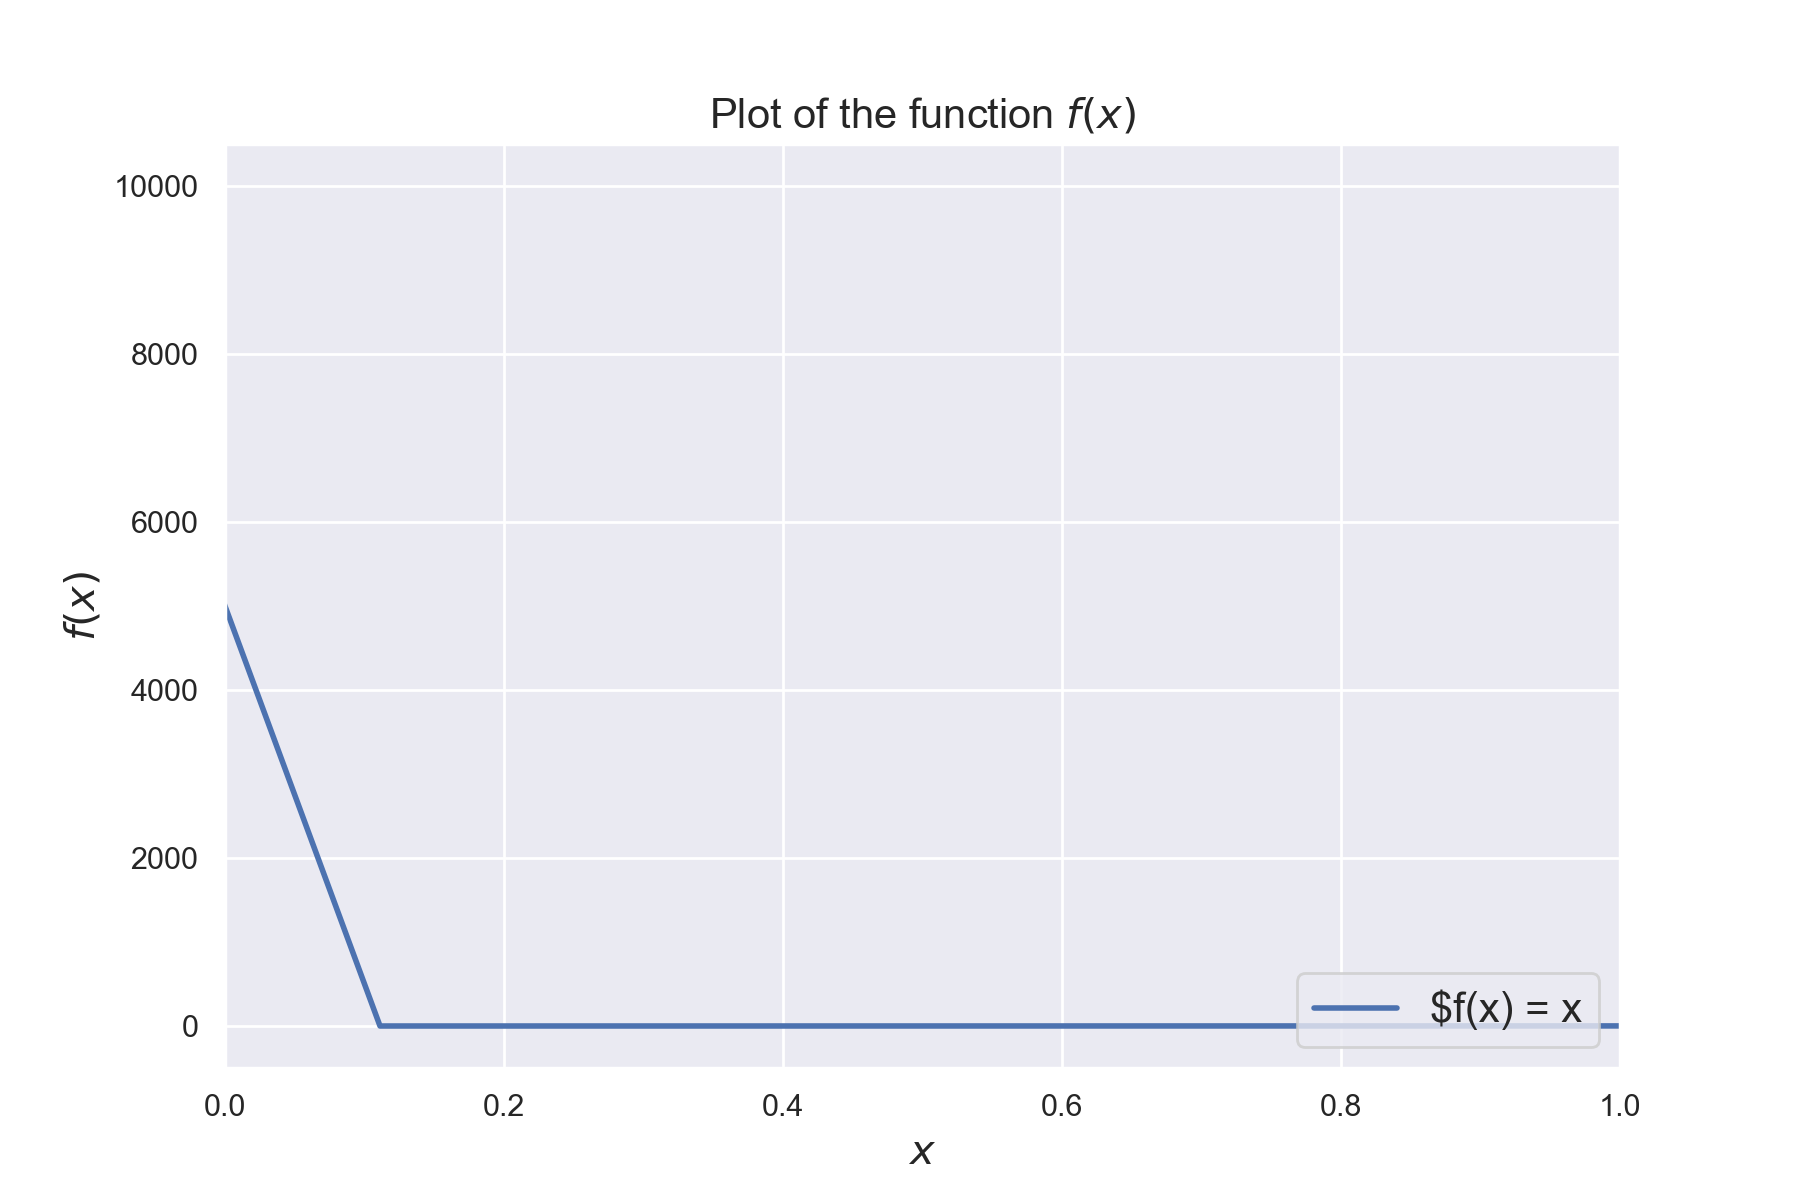

Text(0, 0.5, '$f(x)$')

In [7]:
# Let's plot the function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

line = ax.plot(x, v, lw=2, color='b', label=r'$f(x) = x')

ax.set_xlim((0.0, 1.0))

ax.set_title(r'Plot of the function $f(x)$', fontsize=15) 
ax.legend(loc=4, fontsize=15)
ax.set_xlabel(r'$x$', fontsize=15.0)
ax.set_ylabel(r'$f(x)$', fontsize=15.0)    

## Change the number of points in the mesh

Often we will want to study the behavior of a numerical method we different levels of refinement. For a uniform mesh, refinement simply means increasing the total number of discrete points (nodes) used to define the mesh of the computational domain. Good practice is to use three levels of successive refinement. We will define a base number of mesh points, $N$, and the a **coarse** mesh with half the number of points, and a **fine** mesh with double the number of points.

To simplify the notation, let's refer to these as $N_0$, $N_1$, and $N_2$

\begin{equation}
N_\textrm{coarse} = N_0 = \frac{N}{2}
\end{equation}

\begin{equation}
N_\textrm{base} = N_1 = N
\end{equation}

\begin{equation}
N_\textrm{fine} = N_2 = 2 N
\end{equation}




In [ ]:
# Create three uniform meshs for the domain [-1,1]
#   - x_coarse = x_0
#   - x_base = x_1
#   - x_fine = x_2

## Discretize a function on each mesh

Let's use a slightly more complex function, 

\begin{equation}
f(x) = x^2
\end{equation}

Recall we are interested in how the derivatives of a function are computed on a discrete domain (mesh) using a finite-difference approximation. Since the derivative of $f(x) = x^2$, is easy to compute analytically, $f^{\prime}(x) = x$, we can use it to confirm wether or not our finite-difference approximation is qualitiatively correct. 

In [ ]:
# f_0 =
# f_1 =
# f_2 =

## Compute the finite-difference approximation of the first derivative

Compute $f^{\prime}(x)$ at each mesh point using the following finite-difference approximation for the first derivative:

\begin{equation}
\frac{\textrm{d} f}{\textrm{d} x} \approx \frac{ f(x_i + \Delta x) - f(x_i) }{\Delta x} = \frac{f_{i+1} - f_i }{\Delta x}
\end{equation}

To analyze how our approximations might change for different number of mesh points, compute the first derivative for each of the different size meshes.

In [ ]:
# dfdx_1 =
# dfdx_2 = 
# dfdx_3 =

## How do we know our finite-difference approximations are accurate?

1. We do a solution, there is some analytical solution.
2. We would compare the solutions at different resolutiosn, coarse to fine. 
3. Method of manufactured solutions.

## Convert the finite-difference approximation into a matrix operator 

As discussed during lecture, we can write the finite-difference approximations at each point in the mesh as a matrix operator, $\mathbf{A}$. Consider the 1-D, advection equation, 

\begin{equation}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\end{equation}

Using the method of lines, we can write a numerical approximation to the 1-D, advection equation like

\begin{equation}
\frac{\textrm{d} \mathbf{u} }{\textrm{d} t} = \mathbf{A} \mathbf{u}
\end{equation}

where the vector $\mathbf{u} = [u(x_0,t), u(x_1,t), \dots, u(x_N,t)]$ where the matrix $\mathbf{A}$ is 

\begin{equation}
\mathbf{A} = -a \mathcal{D}
\end{equation}

where $\mathcal{D}$ is the difference-operator, sometimes it is written as $\delta_x$ or as $\mathcal{D}_x$, where the subscript means the difference-operator is an approximation of the first-derivative with respect to $x$, $\delta_{xx}$ would be an approximationof the second-derivative with respect to $x$.

Using the approximation of the first derivative, 

\begin{equation}
\frac{\textrm{d} u}{\textrm{d} x} \approx \frac{ u(x_i + \Delta x) - u(x_i) }{\Delta x} = \frac{u_{i+1} - u_i }{\Delta x}
\end{equation}

what is the matrix operator for the one-dimensional, advection equation. Assume the initial condition for $u(x,t)$ is given as

\begin{equation}
u(x,0) = f(x)
\end{equation}

where $f(x) = x^2$ 


In [ ]:
# what is Dx? 

## Compute the RHS using the matrix operator

Compute $\mathbf{A}\mathbf{u}$. There are a few ways to do this, and which way is best really depends on the scale of the problem we are trying to solve. Recall that $\mathbf{A}$ is a sparse matrix with most of the elements in the matrix being zero. Is there some pattern to the non-zero entries of $\mathbf{A}$ we can use to design a more compact way to represesnting the matrix? What about the fact that for periodic boundaries, the matrix $\mathbf{A}$ is circulant?

The answer to all of those questions is yes. There are ways to effeciently represent the sparse matrix $\mathbf{A}$, and yes we should do this (if only because it real-world applications you must, and because it is good practice to write memory efficient programs). 

**But**, let's start with a naive implementation. Use $N=4$.

How do you know it is correct?

In [ ]:
# A = -a D
# u = [u0, u1, u2, ..., uN]

# Au = -a * dudx

## Can A be represented as a banded-matrix?

A banded matrix is a matrix whose only non-zero elements are along the diagonals of the matrix. For non-periodic boundary conditions, the matrix $\mathbf{A}$ is banded. (We can modify how we treat the periodicity of the domain if we want to use a periodic matrix, we just can not encode all that information into the matrix $\mathbf{A}$.)



In [ ]:
# Scipy provides methods to store sparse matrices, such as diag_matrix